# Tarea 2 v2

In [35]:
library(dplyr)
library(ggplot2)
library(tidyr)


# PARTE 1:  EXPLORACIÓN DE DATOS Y VARIABLES

1. Investigue acerca de como se fija una tasa de interes para un credito:  regulaciones y factores que influyen en fijar la tasa ofrecida a cada persona.


### HOLA 


Una puntuación FICO es un tipo de puntuación de crédito creada por Fair Isaac Corporation. Los prestamistas utilizan las calificaciones FICO de los prestatarios junto con otros detalles sobre los informes de crédito de los prestatarios para evaluar el riesgo de crédito y determinar si extender el crédito. Las puntuaciones de FICO tienen en cuenta varios factores en cinco áreas para determinar la solvencia: historial de pagos, nivel actual de endeudamiento, tipos de crédito utilizados, duración del historial de crédito y nuevas cuentas de crédito.

https://www.investopedia.com/terms/f/ficoscore.asp

<img src='https://www.investopedia.com/thmb/SBOkuFtkI3b5kfXCBoEBOwO-szk=/692x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/FICO-Scores-0474cc0ca87b4b58b9391f065f623c0f.jpg'>

2. Descargue los datos y analice las variables con las que cuenta. Evalue la necesidad denormalizar/estandarizar los datos o transformar las variables (por ejemplo a dummy oaplicar logaritmo). Justifique.

La descripción de las variables es la siguiente:

*Cada ID representa un cliente

- Amount.Requested: Prestamo Solicitado por el cliente

- Amount.Funded.By.Investors: Monto del préstamo sancionado por el banco para los clientes

- Interest.Rates: La tasa de interés fijada por el banco para cada cliente.

- Loan.Length: Periodo de tenencia del préstamo

- Loan.Purpose: Propósito del Prestamo

- Debt.To.Income.Ratio: Proporción de las deudas totales del cliente en función de sus ingresos totales 

- State: Estado en el que reside el cliente

- Home.Ownershi: Estado de la vivienda propiedad del cliente.

- Monthly.Income: Ingresos mensuales del cliente

- FICO range: Rango de puntaje de crédito del cliente

-  Open.Credit.Lines: Cantidad de deudas paralelas que tienen los clientes

- Revolving.Credit.Balance: Saldo total de la deuda considerando todas las líneas de crédito abiertas

- Inquiries.in.last.6.months: Número de consultas de crédito en los últimos 6 meses(veces que se consultó por un credito)

- Employment.Length: Experiencia laboral de los clientes

Comenzamos leyendo los datos

In [36]:
df <- read.csv('loan_data_train.csv',sep=',',check.names=FALSE)

Revisamos cuántos valores nulos tenemos

In [37]:
sapply(df,function(x) x=sum(is.na(x))) 

ID               Amount.Requested 
                             1                              1 
    Amount.Funded.By.Investors                  Interest.Rate 
                             1                              0 
                   Loan.Length                   Loan.Purpose 
                             1                              1 
          Debt.To.Income.Ratio                          State 
                             1                              1 
                Home.Ownership                 Monthly.Income 
                             1                              3 
                    FICO.Range              Open.CREDIT.Lines 
                             0                              4 
      Revolving.CREDIT.Balance Inquiries.in.the.Last.6.Months 
                             3                              3 
             Employment.Length 
                             0

Como tenemos valores nulos, procedemos a omitirlos

In [38]:
df <- na.omit(df)      

Observamos la estadística descriptiva de los datos

In [39]:
str(df)

'data.frame':	2186 obs. of  15 variables:
 $ ID                            : int  79542 75473 67265 80167 17240 32737 71685 38028 32119 84563 ...
 $ Amount.Requested              : Factor w/ 356 levels ".","1000","10000",..: 195 148 160 214 187 275 93 294 185 327 ...
 $ Amount.Funded.By.Investors    : Factor w/ 658 levels "-0.01",".","0",..: 370 253 286 398 200 498 170 537 334 596 ...
 $ Interest.Rate                 : Factor w/ 265 levels "10.00%","10.08%",..: 169 152 94 135 42 253 208 237 57 238 ...
 $ Loan.Length                   : Factor w/ 3 levels ".","36 months",..: 3 3 2 2 3 2 3 2 3 2 ...
 $ Loan.Purpose                  : Factor w/ 14 levels "car","credit_card",..: 3 3 7 2 2 12 2 7 5 10 ...
 $ Debt.To.Income.Ratio          : Factor w/ 1526 levels "0%","0.04%","0.17%",..: 1059 258 1146 664 925 1320 131 1501 405 1 ...
 $ State                         : Factor w/ 46 levels ".","AK","AL",..: 41 31 18 30 32 32 6 14 26 26 ...
 $ Home.Ownership                : Factor w/ 5 levels "M

A primera vista notamos que hay muchas variables como factor o categorías, de las cuales algunas no hacen mucho sentido tener esta forma, como "Amount.Requested", "Amount.Funded.By.Investor", "Interest.Rate", "Debt.To.Income.Ratio", "Open.CREDIT.Lines" y "Revolving.CREDIT.Balance". Por lo tanto las vamos a convertir a variables numericas y a enteras dependiendo el caso. De esta forma podremos hacer un mejor análisis. Asimismo el resto de variables se dejarán como categoricas, ya que no tiene mucho sentido cambiar su tipo.

Asimismo, con respecto a la variable dependiente, se utilizará sin aplicar logaritmo, principalmente porque tenemos un conjunto de valores acotados.

In [40]:
df$Interest.Rate <- as.character(df$Interest.Rate)
df$Interest.Rate <- substr(df$Interest.Rate,1,nchar(df$Interest.Rate)-1)
df$Interest.Rate <- as.numeric(df$Interest.Rate)

df$Debt.To.Income.Ratio <- as.character(df$Debt.To.Income.Ratio)
df$Debt.To.Income.Ratio <- substr(df$Debt.To.Income.Ratio,1,nchar(df$Debt.To.Income.Ratio)-1)
df$Debt.To.Income.Ratio <- as.numeric(df$Debt.To.Income.Ratio)

df$Revolving.CREDIT.Balance <- as.numeric(as.character(df$Revolving.CREDIT.Balance))
df$Amount.Requested <- as.numeric(as.character(df$Amount.Requested))

df$Open.CREDIT.Lines <- as.character(df$Open.CREDIT.Lines)
df$Open.CREDIT.Lines <- as.integer(df$Open.CREDIT.Lines)

df$Amount.Funded.By.Investors <- as.character(df$Amount.Funded.By.Investors)
df$Amount.Funded.By.Investors <- as.numeric(df$Amount.Funded.By.Investors)

#Quitamos aquellos valores que contienen un punto porque ensucian los datos
df<-df[df$Loan.Length!='.',]

Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"

In [41]:
#Luego de aplicar los cambios a las variables, notamos que algunos datos pasaron a ser nulos, los que omtiriemos nuevamente
df<- na.omit(df)

In [42]:
head(df,n=3)

ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
79542,25000,25000,18.49,60 months,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11,15210,3,5 years
75473,19750,19750,17.27,60 months,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14,19070,3,4 years
67265,2100,2100,14.33,36 months,major_purchase,3.50,LA,OWN,1000.00,690-694,13,893,1,< 1 year


# 3. Realice un grafico de dispersion para algunas variables que considere relevantes en este problema. Realice graficos para ver la relacion entre las variables independientes con la dependiente.

Considerando a grandes rasgos la tasa de interés como el riesgo que le produce al banco prestar dinero, se dará una breve visión sobre las variables que tenemos y se considierarán aquellas que hacen sentido en relación con la tasa de interés.

Variables de interés:

- Employment.Length: Personas con mayor experiencia laboral puede demostrar cierto control y consistencia económica, por lo que parece ser interesante buscar alguna relación con la tasa de interés aplicada a los créditos.
- Monthly.Income: La tendencia es que gente con mayores ingresos es menos riesgosa por lo tanto puede incurrir en tasas de interés más altas 
- Debt.To.Income.Ratio: La proporción de las deudas también parece ser una variable interesante de considerar, porque aquellas personas que tienen un radio de deuda bastante alto puede no ser de confianza y generar desconfianza al banco.
- Home.Ownership: El estado de la vivienda del cliente puede reflejar por un lado la capacidad de solvencia del cliente y aumentar el riesgo y por ende la tasa de interés, por lo que parece una interesante variable a considerar.
- Amount.Requested:
- Loan.Length: Mientras mas larga es la deuda, mayor es el riesgo por lo que podría existir al prestar dinero por un plazo más extendido, por lo que se puede considerar como variable de interés.
- Open.CREDIT.Lines: La cantidad de deudas pararelas pueden ser un indicador de sustento económico de la persona, por lo que puede existir cierto efecto sobre la tasa de interés.
- Inquiries.in.the.Last.6.Months: Desde la perspectiva del banco, aquellas personas que han consultado con mayor frecuencia en los últimos meses algún tipo de crédito podrían estar en una situación desfavorable y por tanto existiría un riesgo mayor en prestar dinero a este tipo de personas.



### Graficaremos nuestras variables de interés con respecto a la tasa de interés

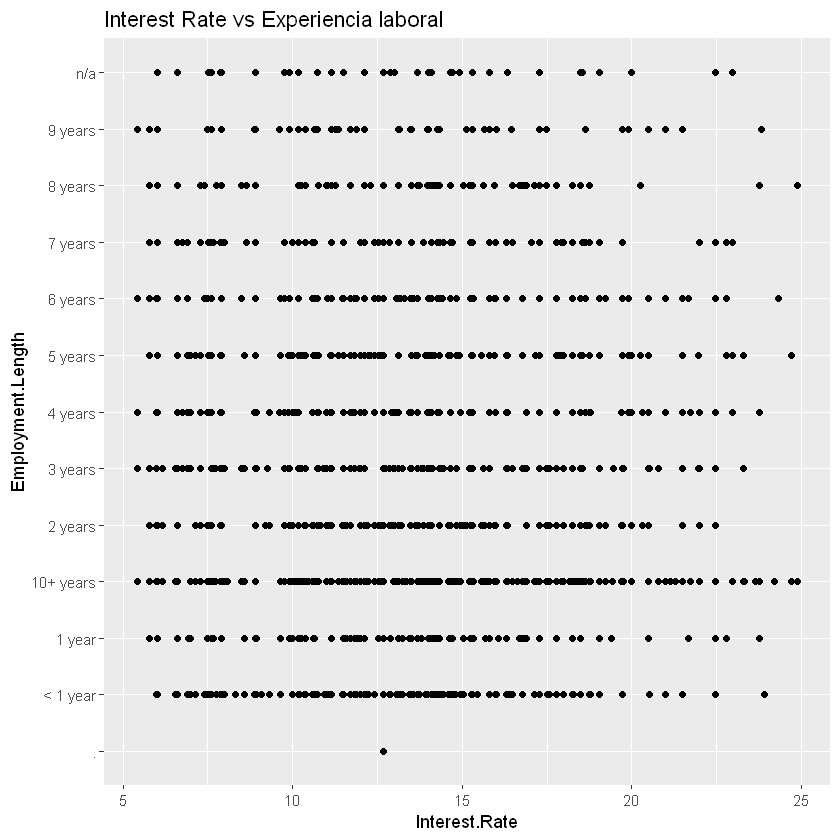

In [43]:
ggplot(df, aes(y= Employment.Length , x = Interest.Rate )) + geom_point() + ggtitle('Interest Rate vs Experiencia laboral')

Es dificil encontrar cierta tendencia o efecto en este gráfico. Observemos mejor un boxplot.

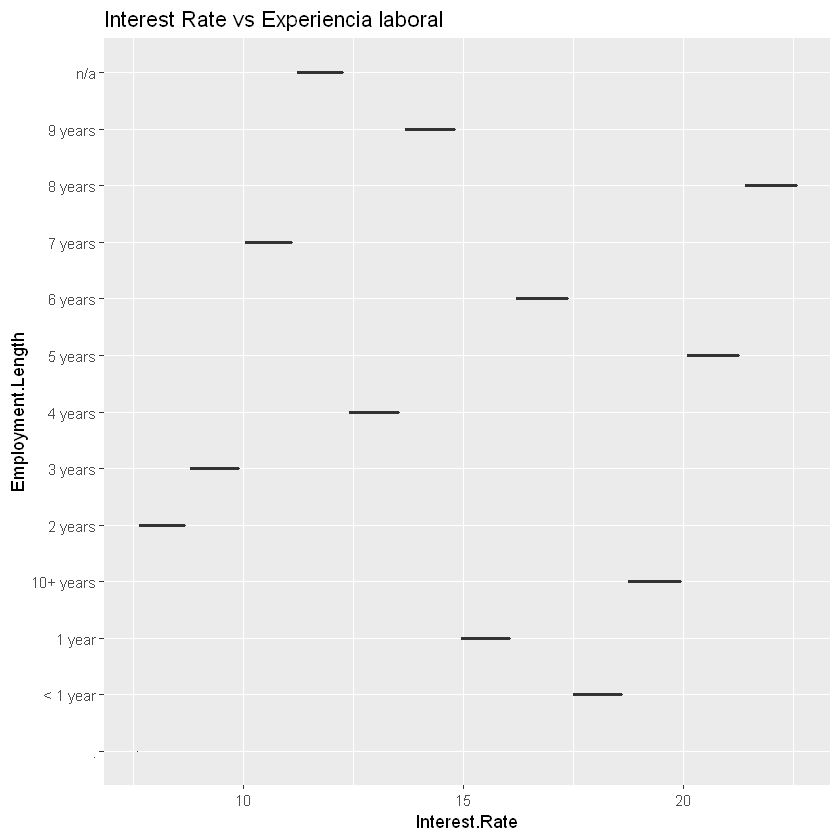

In [44]:

ggplot(df,aes(y=Employment.Length ,x=Interest.Rate))+geom_boxplot() +  ggtitle('Interest Rate vs Experiencia laboral')

A grandes rasgos no se observa alguna relación entre la experiencia laboral y la tasa de interés.

Graficamos el logartirmo de los ingresos mensuales en función de la tasa de interés para obtener un gráfico mejor distribuido, ya que de otra forma queda toco acumulado a un lado.

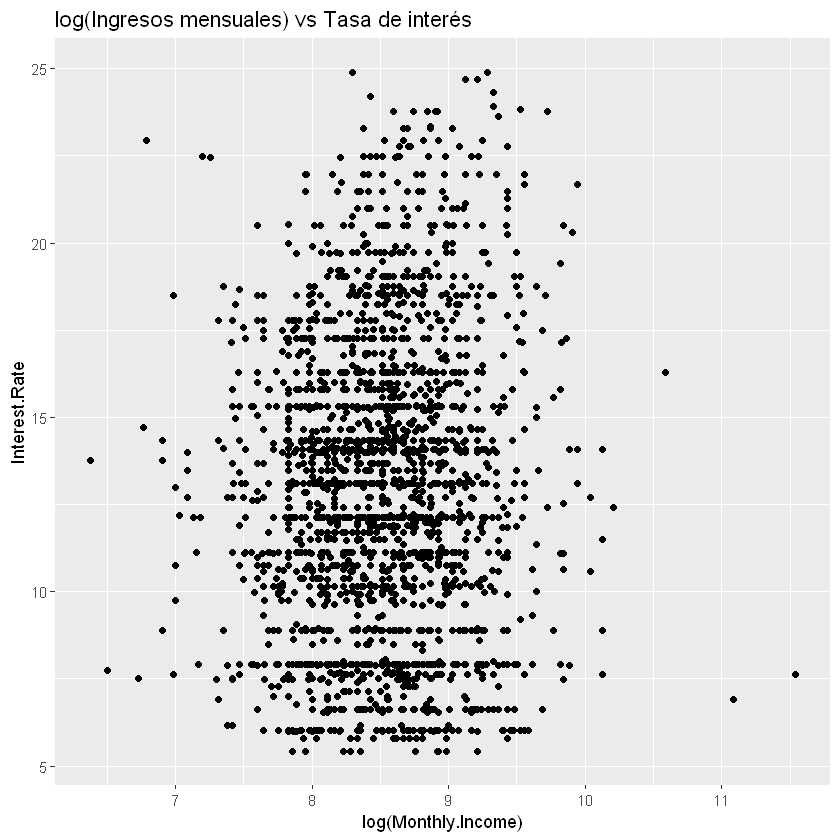

In [45]:
ggplot(df, aes(x=log(Monthly.Income),y=Interest.Rate))+geom_point() + ggtitle('log(Ingresos mensuales) vs Tasa de interés ')

De igual forma se hace complejo encontrar alguna tendencia o efecto.

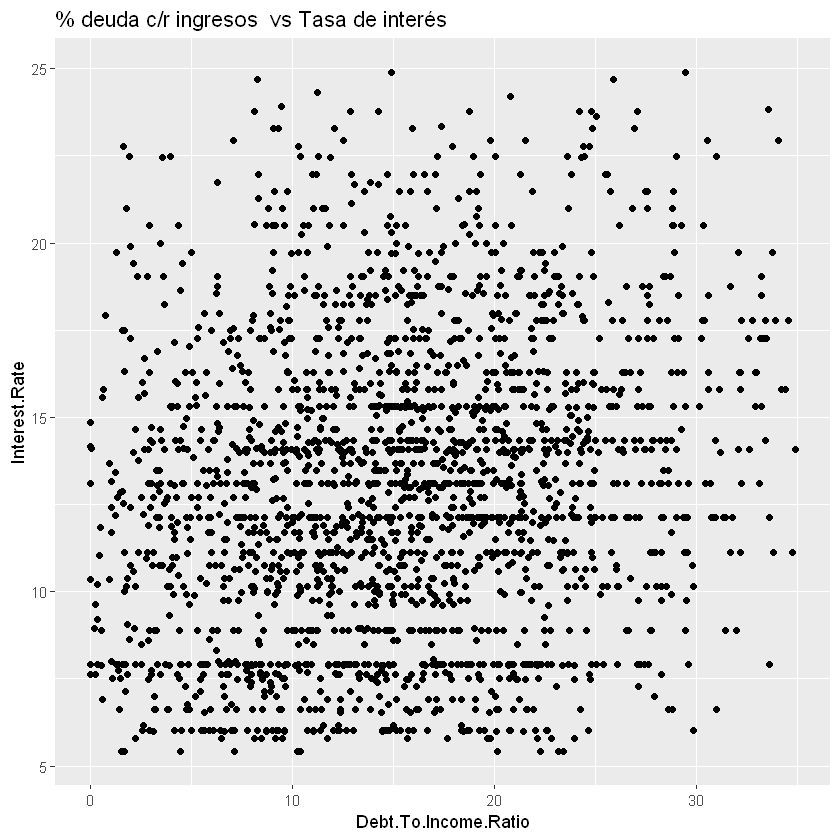

In [46]:
ggplot(df,aes(x=Debt.To.Income.Ratio,y=Interest.Rate))+geom_point()+ggtitle('% deuda c/r ingresos  vs Tasa de interés')

Tampoco se logra ver alguna tendencia

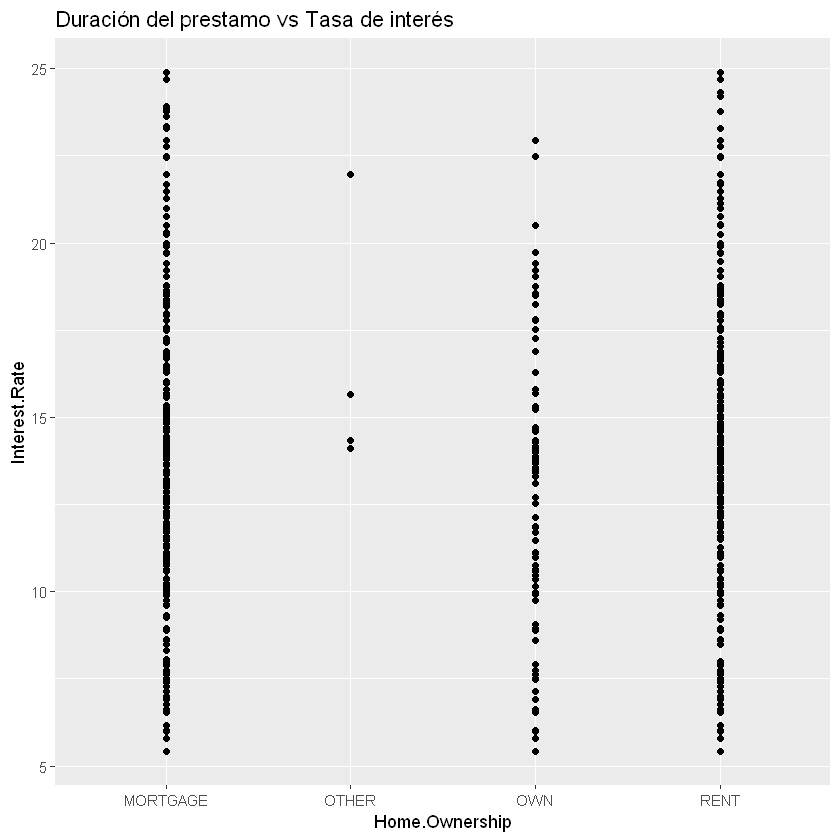

In [47]:
ggplot(df,aes(x=Home.Ownership,y=Interest.Rate))+geom_point()+ggtitle('Duración del prestamo vs Tasa de interés')

Si bien existe bastante dispersión, se puede notar que aquellas personas que son propietarios de su casa tienden a alcanzar menores tasas de interés.

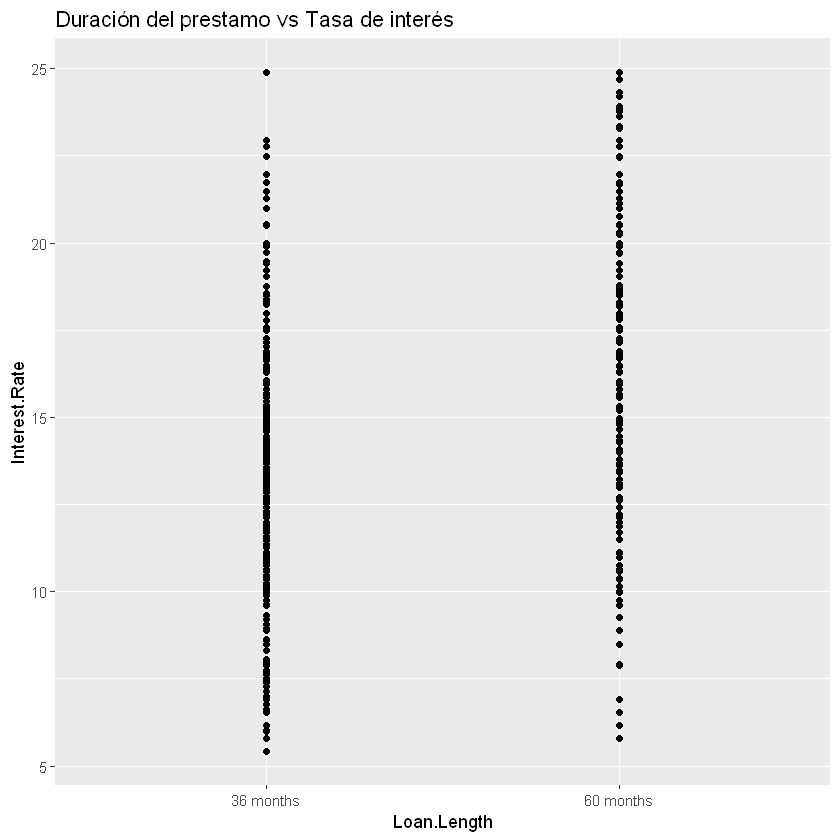

In [48]:
ggplot(df,aes(x=Loan.Length,y=Interest.Rate))+geom_point()+ggtitle('Duración del prestamo vs Tasa de interés')

No se observa muy bien o es complejo analizar alguna tendencia, haremos un boxplot para visualizar mejor.

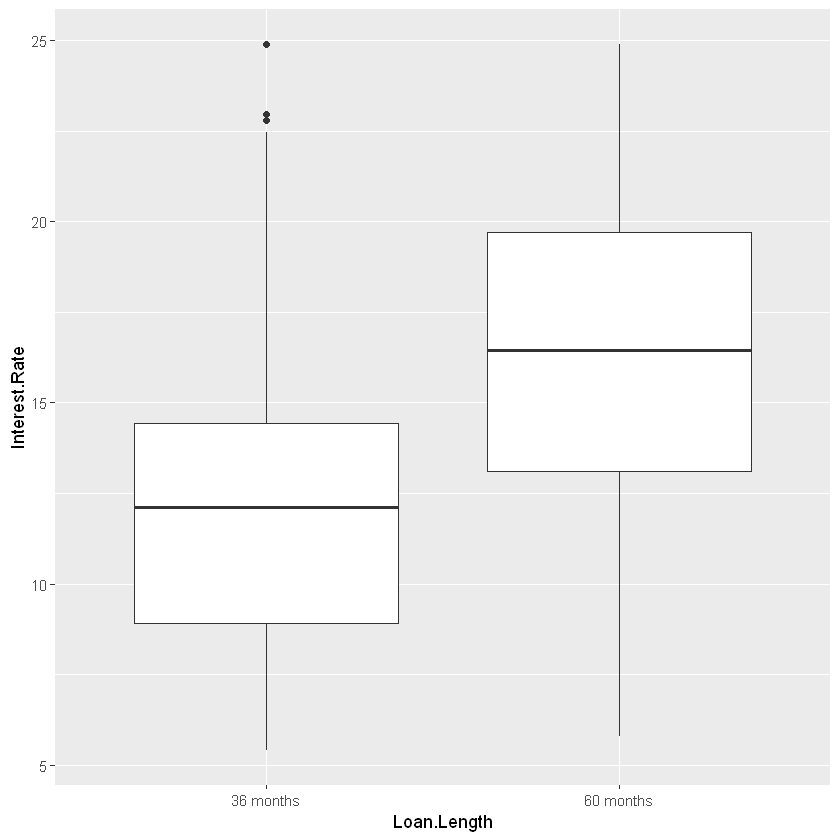

In [49]:
ggplot(df,aes(x=Loan.Length,y=Interest.Rate))+geom_boxplot()

Se puede observar que los créditos a más meses de plazo tienden a tener más tasa de interés.

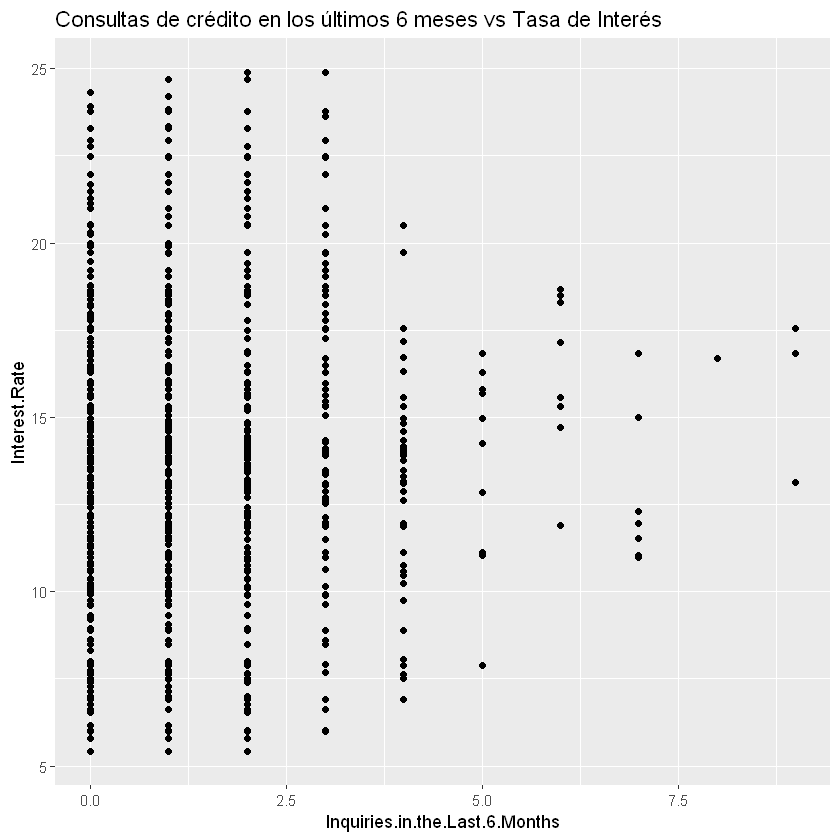

In [50]:
ggplot(df,aes(x=Inquiries.in.the.Last.6.Months,y=Interest.Rate))+geom_point()+ggtitle('Consultas de crédito en los últimos 6 meses vs Tasa de Interés')

Si graficamos el monto solicitado del prestamos vs la tasa de interés, se observa bastante dispersión y a priori no existe tendencia.

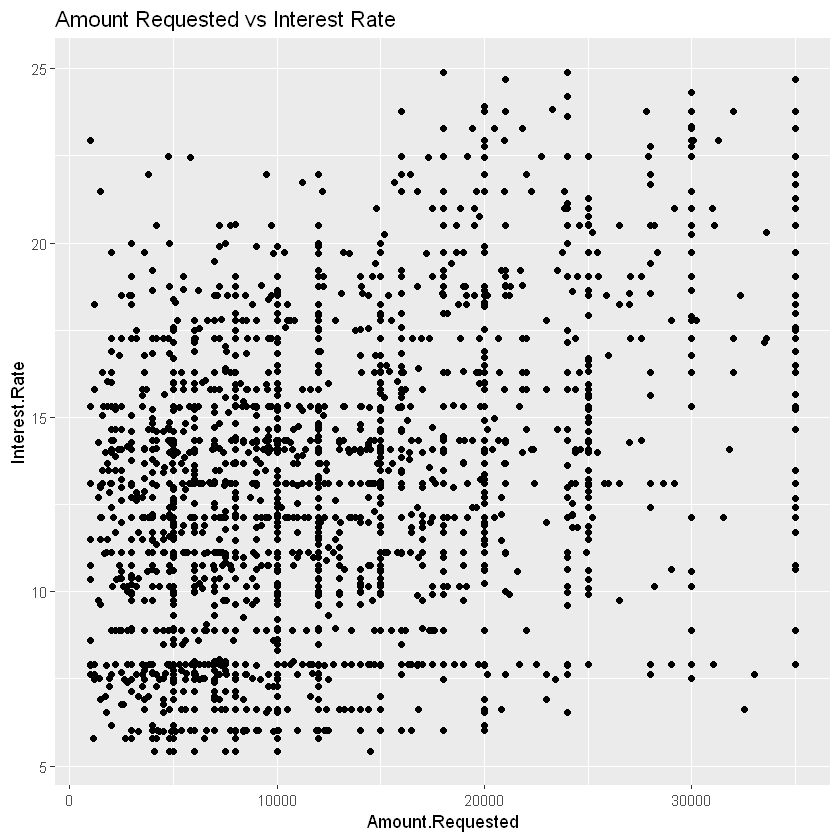

In [51]:
ggplot(df, aes(x= Amount.Requested , y = Interest.Rate )) + geom_point() + ggtitle('Amount Requested vs Interest Rate')


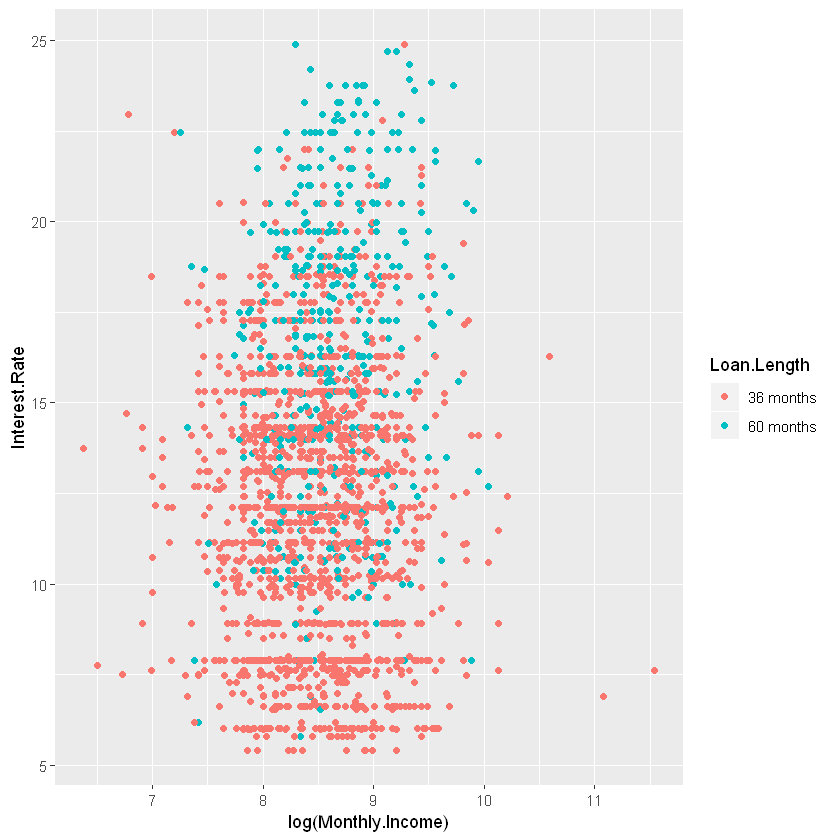

In [52]:
ggplot(df, aes(x = log(Monthly.Income), y = Interest.Rate, color = Loan.Length)) + geom_point()

4. Analice la relevancia que tiene cada variable con la variable dependiente y entre ellas.

In [53]:
#Seleccionamos sólo las variables no categoricas.
inCorr <- select(df, -c(ID,Loan.Length, Loan.Purpose, State, Home.Ownership, FICO.Range, Employment.Length))
cormat <- round(cor(inCorr),2)

In [54]:
#http://www.sthda.com/english/wiki/ggplot2-quick-correlation-matrix-heatmap-r-software-and-data-visualization
get_upper_tri <- function(cormat){
cormat[lower.tri(cormat)]<- NA
return(cormat)
}

In [55]:
upper_tri <- get_upper_tri(cormat)

In [56]:
library(reshape2)
melted_cormat <- melt(upper_tri, na.rm = TRUE)

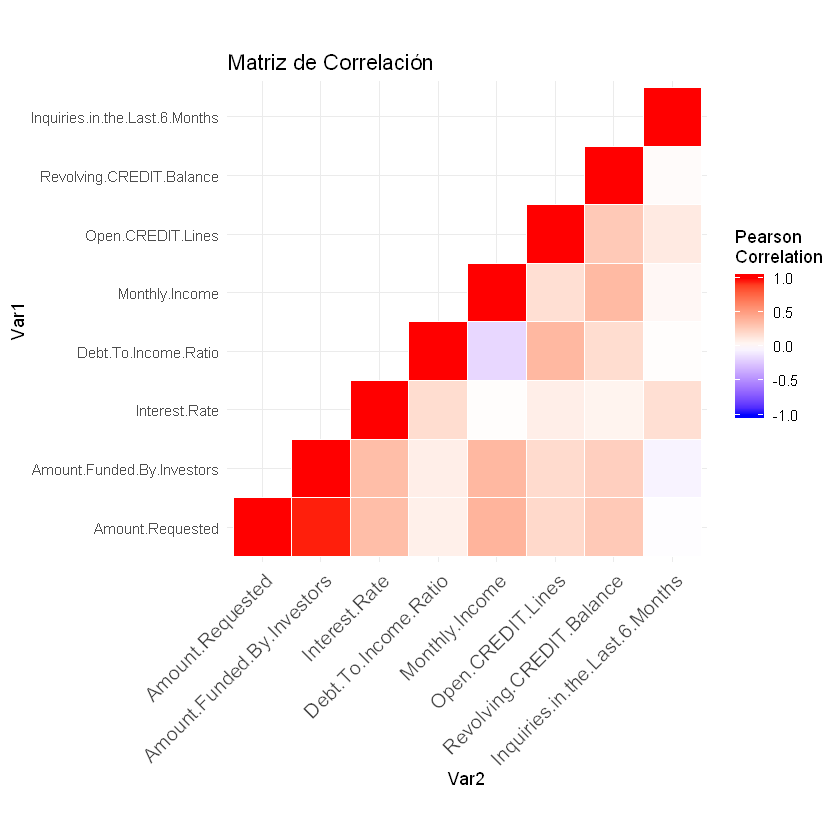

In [57]:
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
geom_tile(color = "white")+
scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
theme_minimal()+ 
theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
coord_fixed() +
labs(title='Matriz de Correlación')

In [58]:
library(corrplot)
corr_mat <- cor(select(df, -c(ID,Loan.Length, Loan.Purpose, State, Home.Ownership, FICO.Range, Employment.Length))
)
corrplot(corr_mat, method="color", type="upper")

ERROR: Error in library(corrplot): there is no package called 'corrplot'


Lo primero que podemos concluir es que existe una correlación casi total con respecto a las variables "Amount.Requested" y "Amount.Funded.By.Investor" que tiene toda la lógica, pues obviamente el monto solicitado por el cliente está estrechamente relacionado con lo que realmente recibirá de parte del banco. 



Plantee 3 modelos de regresion lineal para la variable dependiente de interes.  Recuerdeque  puede  utilizar  transformaciones  de  las  variables  (cuadraticas, logarıtmicas)  o  agregarinteracciones entre ellas.  Adem ́as puede eliminar observaciones que ensucien su analisis.L aeleccion de las variables utilizadas y su forma de ser incorporada al modelo debe sustentarseen los analisis realizados en la Parte 1 de esta Tarea.

Luego,  analice los resultados obtenidos:  compareR2,  test de hipótesis correspondientesy  concluya  con  respecto  a  los  efectos  (significativos  o  no)  estimados.   Luego,  responda  lassiguientes dos preguntas:

Interest Vars:
- Amount.Requested
- Loan.Length
- Debt.To.Income.Ratio
- Home.Ownership
- Monthly.Income
- Open.CREDIT.Lines
- Inquiries.in.the.Last.6.Months
- Employment.Length*

In [ ]:
colnames(df)

In [59]:
lm1 <- lm(Interest.Rate ~ Revolving.CREDIT.Balance+Open.CREDIT.Lines, data = df)
summary(lm1)


Call:
lm(formula = Interest.Rate ~ Revolving.CREDIT.Balance + Open.CREDIT.Lines, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3112 -3.0036 -0.0338  2.6175 11.9016 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.216e+01  2.196e-01  55.373  < 2e-16 ***
Revolving.CREDIT.Balance 8.289e-06  4.951e-06   1.674 0.094199 .  
Open.CREDIT.Lines        7.692e-02  2.066e-02   3.722 0.000202 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.154 on 2170 degrees of freedom
Multiple R-squared:  0.01002,	Adjusted R-squared:  0.00911 
F-statistic: 10.98 on 2 and 2170 DF,  p-value: 1.792e-05


In [60]:
lm <- lm(Interest.Rate ~ Amount.Requested + Loan.Length + Debt.To.Income.Ratio + Home.Ownership + Monthly.Income + Open.CREDIT.Lines + Inquiries.in.the.Last.6.Months , data=df)
summary(lm)


Call:
lm(formula = Interest.Rate ~ Amount.Requested + Loan.Length + 
    Debt.To.Income.Ratio + Home.Ownership + Monthly.Income + 
    Open.CREDIT.Lines + Inquiries.in.the.Last.6.Months, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4859  -2.7979   0.0609   2.4724  11.2759 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     8.811e+00  2.780e-01  31.697  < 2e-16 ***
Amount.Requested                1.252e-04  1.172e-05  10.687  < 2e-16 ***
Loan.Length60 months            3.345e+00  2.029e-01  16.487  < 2e-16 ***
Debt.To.Income.Ratio            8.064e-02  1.131e-02   7.129 1.37e-12 ***
Home.OwnershipOTHER             4.247e+00  1.771e+00   2.398  0.01659 *  
Home.OwnershipOWN               5.694e-01  2.922e-01   1.949  0.05147 .  
Home.OwnershipRENT              1.236e+00  1.634e-01   7.564 5.74e-14 ***
Monthly.Income                 -5.683e-05  2.133e-05  -2.664  0.00777 ** 
Open.CREDIT.Line

1. ¿A que se debe los resultados que obtiene?

2.  ¿Identifica algun problema de endogeneidad en su analisis?  ¿Como podr ́ıa solucionarse?

La distribuci ́on de puntaje en esta parte es de 1.5 puntos por cada modelo planteado y su analisis (0.5 ptos.  por el modelo y su justificacion, 1.0 pto por el an ́análisis de resultados).